Hill Climbing
=======

# Theory

## Definition


## Examples


# Implementation


## Imports

In [1]:
import matplotlib
import numpy as np
import pandas as pd
from typing import Callable
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
matplotlib.rcParams['animation.embed_limit'] = 2**128

## Parameters

In [37]:
x_0 = 2.5           # method starting value
generate_neighborhood = lambda x : np.array([x + h for h in [x*0.01, -(x*0.01)]])          # step size
func = lambda x: x**2         # use sp. methods only "i.e sp.cos()"

## Algorithm


In [38]:
def HC(cost_func: Callable, generate_neighborhood: Callable, x_0: float, maxiter: int = int(5e4), task: str = "minimization") -> tuple[float, list, int]:


    x = np.zeros(maxiter)
    x[0] = x_0

    for i in range(maxiter-1):
        
        neighbors = generate_neighborhood(x[i])
        best_neighbor = neighbors[ cost_func(neighbors).argsort()[0] ]

        # neighbor is better
        if cost_func(best_neighbor) < cost_func(x[i]):
            x[i+1] = best_neighbor

        # neighbor is worse
        if cost_func(best_neighbor) > cost_func(x[i]):
            break
        
    
    x_min, history, steps= x[i+1], x[:i+2], i+1

    return x_min, history, steps

In [39]:

x = 4

x*0.001+x

4.004

In [40]:
generate_neighborhood(4)

array([4.04, 3.96])

## Results Visualization

In [41]:
# domain
# xx = np.linspace(*domain)

# gradient decent
x_min, history, steps = HC(cost_func=func, generate_neighborhood=generate_neighborhood, x_0=x_0)

In [42]:
x_min

0.0

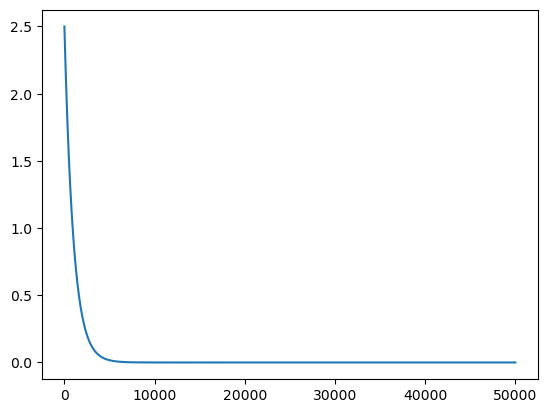

In [36]:
plt.plot(history)